In [38]:
import nltk
from nltk.tokenize import word_tokenize
import numpy as np 
import pandas as pd
import collections
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.tokenize import TweetTokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from string import punctuation
nltk.download("stopwords")
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
from pymystem3 import Mystem
from datetime import datetime, timedelta
import functools
import operator
import chart_studio.plotly as py
#import plotly.graph_obs as go
from plotly.offline import iplot
import cufflinks as cf
from nltk import ngrams
import plotly.express as px


[nltk_data] Downloading package stopwords to /home/victor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/victor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df = pd.read_csv("fb.csv", index_col=0)

In [4]:
df

,time,post,number_comments,comment
0,2020-10-01,Коллеги! Размещаю видео с судебным юристом Тат...,9,"[', спасибо, из за очепятки я прочитала аккуль..."
1,2020-10-05,"Коллеги, клиент не спросив оплатил проверку 19...",2,['документы и регистрировать через регистратор...
2,2020-10-05,Приплыло. Сделка цепь. Нижний просит заложить ...,5,['ИтакаСоглашайтесь на их оценщика . Ссылку пр...
3,2020-10-05,"Коллеги, добрый день! Нужна помощь)) нужны фот...",52,"['ты уже и в Америке работаешь, Наташ?', 'Лурь..."
4,2020-10-05,"Время сейчас такое, что иногда приходят два по...",10,"['распашонка?', 'Лукашевская, да', 'банк?', 'Б..."
...,...,...,...,...
107,2020-10-01,"Уважаемые коллеги, поделитесь пожалуйста опыто...",0,[]
108,2020-10-01,"Уважаемы, коллеги, кто как поступил бы в этой ...",0,[]
109,2019-10-31,"Пост благодарности Серебряков Андрей, или «не...",0,[]
110,2020-10-01,"А нет ли среди вас волшебников, которые смогли...",0,[]


In [5]:
##########TIME#######################
for i in range(len(df)):
    df['time'][i] = datetime.strptime(df["time"][i], '%Y-%m-%d')
#########COMMENTS#####################
for i in range(len(df)):
    df["comment"][i] = list(df["comment"][i][2:-2].replace("'", '').split(','))
tw = TweetTokenizer()
det = TreebankWordDetokenizer()
noise = stopwords.words('russian') + list(punctuation)
upnoise = [letter.upper() for letter in noise]
sum_noise = noise+upnoise+['.','»','«', 'Коллега', "коллега", "это", "который", "свой"]
for i in tqdm(range(len(df))):
    for j in range(len(df["comment"][i])):
        tokenized_example = (tw.tokenize(df["comment"][i][j]))
        filtered_example = [word for word in tokenized_example if not word in sum_noise]
        df["comment"][i][j] = det.detokenize(filtered_example)
mystem_analyzer = Mystem(entire_input=False)
for i in tqdm(range(len(df))):
    df["comment"][i] = [mystem_analyzer.lemmatize(w) for w in df["comment"][i]]
    df["comment"][i] = list(filter(None, df["comment"][i]))

    
##########POSTS##############
for i in tqdm(range(len(df))):
        tokenized_example = (tw.tokenize(df["post"][i]))
        filtered_example = [word for word in tokenized_example if not word in sum_noise]
        df["post"][i] = det.detokenize(filtered_example)
for i in tqdm(range(len(df))):
    a = []
    a.append(df['post'][i])
    df["post"][i] = a
for i in tqdm(range(len(df))):
    df["post"][i] = [mystem_analyzer.lemmatize(w) for w in df["post"][i]][0]
    
df

100%|██████████| 112/112 [00:00<00:00, 635.09it/s]


,time,post,number_comments,comment
0,2020-10-01 00:00:00,"[коллега, размещать, видео, судебный, юрист, т...",9,"[[спасибо], [очепятка, прочитывать, аккультный..."
1,2020-10-05 00:00:00,"[коллега, клиент, спрашивать, оплачивать, пров...",2,"[[документ, регистрировать, регистратор], [ден..."
2,2020-10-05 00:00:00,"[приплывать, сделка, цепь, нижний, просить, за...",5,"[[итакасоглашаться, оценщик, ссылка, присылать..."
3,2020-10-05 00:00:00,"[коллега, добрый, день, нужный, помощь, нужный...",52,"[[америка, работать], [наташа], [лурье], [вспо..."
4,2020-10-05 00:00:00,"[время, такой, приходить, покупатель, квартира...",10,"[[распашонка], [лукашевский], [банк], [быков],..."
...,...,...,...,...
107,2020-10-01 00:00:00,"[уважаемый, коллега, поделиться, пожалуйста, о...",0,[]
108,2020-10-01 00:00:00,"[уважаемый, коллега, поступать, ситуация, стоя...",0,[]
109,2019-10-31 00:00:00,"[пост, благодарность, серебряков, андрей, имет...",0,[]
110,2020-10-01 00:00:00,"[среди, волшебник, который, смочь, срочно, пре...",0,[]


In [6]:
def avg_datetime(series):
    return (series - series.min()).mean() + series.min()


In [39]:
class TextAnalyzer:
    def __init__(self, df):
        self.df = df
    def frequency(self,  numb, text_type, start_date = None, end_date = None, ngram = 1, draw=True, output=True):
        #start&end date = [d, m ,y]
        self.numb = numb
        self.wordcount = {}
        self.text_type = text_type
        self.draw = draw
        #self.start_date = start_date
        #self.end_date = end_date
        if start_date == None and end_date == None:
                self.df1 = self.df
        
        if (type(start_date) == list or type(end_date) == list):
            if (not start_date == None ) and (not end_date==None):
                start_date = datetime(start_date[2], start_date[1], start_date[0], 0, 0)
                end_date = datetime(end_date[2], end_date[1], end_date[0], 0, 0)
                self.df1 = self.df[self.df['time']<end_date]
                self.df1 = self.df1[self.df1['time']>start_date]
            elif (not start_date == None ) and (end_date==None):
                start_date = datetime(start_date[2], start_date[1], start_date[0], 0, 0)
                self.df1 = self.df[self.df['time']>start_date]
            elif (start_date == None ) and (not end_date==None):
                end_date = datetime(end_date[2], end_date[1], end_date[0], 0, 0)
                self.df1 = self.df[self.df['time']<end_date]
        elif (type(start_date) == datetime  and type(end_date) == datetime):
            self.df1 = self.df[self.df['time']<end_date]
            self.df1 = self.df1[self.df1['time']>=start_date]
            
        if ngram>1:
            for i in range(len(self.df1)):
                self.df1['post'][i] = list(ngrams(self.df1['post'][i],2))
        if self.text_type == 'comment':
            self.df1.index = np.arange(len(self.df1))
            for i in range(len(self.df1)):
                for j in range(len(self.df1['comment'][i])):
                    for word in (self.df1['comment'][i][j]):
                        word = word.replace(".","")
                        word = word.replace(",","")
                        word = word.replace(":","")
                        word = word.replace("\"","")
                        word = word.replace("!","")
                        word = word.replace("â€œ","")
                        word = word.replace("â€˜","")
                        word = word.replace("*","")
                        word = word.replace(" ","")
                        if word not in sum_noise:
                            if word not in self.wordcount:
                                self.wordcount[word] = 1
                            else:
                                self.wordcount[word] += 1
        if self.text_type == 'post':
            self.df1.index = np.arange(len(self.df1))
            for i in range(len(self.df1)):   
                for word in self.df1['post'][i]:
                    word = word.replace(".","")
                    word = word.replace(",","")
                    word = word.replace(":","")
                    word = word.replace("\"","")
                    word = word.replace("!","")
                    word = word.replace("â€œ","")
                    word = word.replace("â€˜","")
                    word = word.replace("*","")
                    word = word.replace(" ","")
                    if word not in sum_noise:
                        if word not in self.wordcount:
                            self.wordcount[word] = 1
                        else:
                            self.wordcount[word] += 1
        self.word_counter = collections.Counter(self.wordcount)
        if output:
            print("The {} most common words are as follows\n".format(self.numb))
            for word, count in self.word_counter.most_common(self.numb):
                print(word, ": ", count)
        if self.draw:
            lst = self.word_counter.most_common(self.numb)
            df_cnt = pd.DataFrame(lst, columns = ['Word', 'Count'])
            df_cnt.plot.bar(x='Word',y='Count')
    def date_top(self, text_type, start_date_1 = None, end_date_1 = None, draw = False):
        if start_date_1 == None and end_date_1 == None:
            self.df1 = self.df
        elif (not start_date_1 == None ) and (not end_date_1==None):
            start_date_1 = datetime(start_date_1[2], start_date_1[1], start_date_1[0], 0, 0)
            end_date_1 = datetime(end_date_1[2], end_date_1[1], end_date_1[0], 0, 0)
            self.df1 = self.df[self.df['time']<end_date_1]
            self.df1 = self.df1[self.df1['time']>=start_date_1]
        elif (not start_date_1 == None ) and (end_date_1==None):
            start_date_1 = datetime(start_date_1[2], start_date_1[1], start_date_1[0], 0, 0)
            self.df1 = self.df[self.df['time']>=start_date_1]
        elif (start_date_1 == None ) and (not end_date_1==None):
            end_date_1 = datetime(end_date_1[2], end_date_1[1], end_date_1[0], 0, 0)
            self.df1 = self.df[self.df['time']<end_date_1]
            
        self.dates = np.sort(self.df1['time'].unique())
        self.top_words = []
        for i in range(len(self.dates)):
            self.frequency(1, text_type, start_date = self.dates[i], end_date = self.dates[i]+timedelta(days=1), draw = draw, output=False)
            self.top_words.append(self.word_counter.most_common(1)[0][0])
            print(self.word_counter.most_common(1)[0][0], self.dates[i], '\n')
    def word_in_time(self, word):
        self.word = word
        self.dates = np.sort(self.df['time'].unique())
        self.wrd_cnt = []
        for i in range(len(self.dates)):
            self.count = 0
            self.dfwrd = df[df['time'] == self.dates[i]]
            self.dfwrd.index = np.arange(len(self.dfwrd))
            for j in range(len(self.dfwrd)):
                for word1 in self.dfwrd['post'][j]:
                    if word1 == self.word:
                        self.count +=1
                for comm in self.dfwrd['comment'][j]:
                    for word2 in comm:
                        if word2 == self.word:
                            self.count +=1
            self.wrd_cnt.append(self.count)
        self.plots = pd.DataFrame(self.wrd_cnt)
        self.plots['date'] = self.dates
        f = plt.figure(figsize=(19, 15))
        fig = px.line(self.plots, x='date', y = 0)
        fig.update_xaxes(
            rangeslider_visible=True,
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")
                ])
            )
        )
        fig.show()

In [40]:
test = TextAnalyzer(df)

The 6 most common words are as follows

⠀ :  8
эфир :  4
прямой :  3
занятие :  2
риэлтор :  2
запись :  2


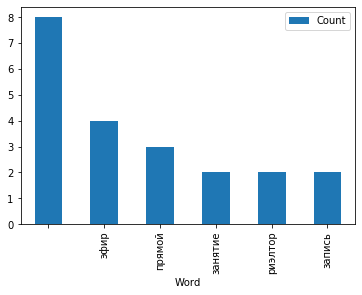

In [130]:
test.frequency(6, 'post', start_date=[20,9,2020], end_date=[22,9,2020])

In [131]:
test.date_top('post')

андрей 2019-10-31 00:00:00 

хороший 2020-01-10 00:00:00 

уважаемый 2020-08-25 00:00:00 

сегодня 2020-08-31 00:00:00 

задаток 2020-09-18 00:00:00 

⠀ 2020-09-21 00:00:00 

завещание 2020-09-23 00:00:00 

добрый 2020-09-24 00:00:00 

бороться 2020-09-26 00:00:00 

продавать 2020-09-28 00:00:00 

друг 2020-09-29 00:00:00 

сказать 2020-09-30 00:00:00 

квартира 2020-10-01 00:00:00 

сделка 2020-10-02 00:00:00 

шуба 2020-10-03 00:00:00 

дом 2020-10-04 00:00:00 

квартира 2020-10-05 00:00:00 



In [42]:
test.word_in_time('квартира')

<Figure size 1368x1080 with 0 Axes>

In [26]:
for i in range(len(df)):
    df['post'][i] = list(ngrams(df['post'][i],2))

In [27]:
df['post'][1][1]
wordcount = {}

In [28]:
for i in range(len(df)):   
        for word in df['post'][i]:
            '''word = word.replace(".","")
            word = word.replace(",","")
            word = word.replace(":","")
            word = word.replace("\"","")
            word = word.replace("!","")
            word = word.replace("â€œ","")
            word = word.replace("â€˜","")
            word = word.replace("*","")
            word = word.replace(" ","")'''
            if word not in sum_noise:
                if word not in wordcount:
                    wordcount[word] = 1
                else:
                    wordcount[word] += 1

In [33]:
wordcount.keys()

dict_keys([(('коллега', 'клиент'), ('клиент', 'спрашивать')), (('клиент', 'спрашивать'), ('спрашивать', 'оплачивать')), (('спрашивать', 'оплачивать'), ('оплачивать', 'проверка')), (('оплачивать', 'проверка'), ('проверка', 'сбера')), (('проверка', 'сбера'), ('сбера', 'якобы')), (('сбера', 'якобы'), ('якобы', 'надежно')), (('якобы', 'надежно'), ('надежно', 'теперь')), (('надежно', 'теперь'), ('теперь', 'кабинет')), (('теперь', 'кабинет'), ('кабинет', 'висеть')), (('кабинет', 'висеть'), ('висеть', 'красный')), (('висеть', 'красный'), ('красный', 'замечание')), (('красный', 'замечание'), ('замечание', 'отчет')), (('замечание', 'отчет'), ('отчет', 'оценка')), (('отчет', 'оценка'), ('оценка', 'объект')), (('оценка', 'объект'), ('объект', 'висеть')), (('объект', 'висеть'), ('висеть', 'витрина')), (('висеть', 'витрина'), ('витрина', 'отчет')), (('витрина', 'отчет'), ('отчет', 'оценка')), (('отчет', 'оценка'), ('оценка', 'все')), (('оценка', 'все'), ('все', 'пропадать')), (('все', 'пропадать'),

In [38]:
df1.index = np.arange(len(df1))

In [40]:
for i in range(len(df1)):   
                for word in df1['post'][i]:
                    word = word.replace(".","")
                    word = word.replace(",","")
                    word = word.replace(":","")
                    word = word.replace("\"","")
                    word = word.replace("!","")
                    word = word.replace("â€œ","")
                    word = word.replace("â€˜","")
                    word = word.replace("*","")
                    if word not in sum_noise:
                        if word not in wordcount:
                            wordcount[word] = 1
                        else:
                            wordcount[word] += 1
print("The {} most common words are as follows\n".format(numb))
self.word_counter = collections.Counter(wordcount)
for word, count in self.word_counter.most_common(numb):
    print(word, ": ", count)

NameError: name 'wordcount' is not defined

In [99]:
a[0][0]

'квартира'

In [132]:
df

,time,post,number_comments,comment
0,2020-10-01 00:00:00,"[коллега, размещать, видео, судебный, юрист, т...",9,"[[спасибо], [очепятка, прочитывать, аккультный..."
1,2020-10-05 00:00:00,"[коллега, клиент, спрашивать, оплачивать, пров...",2,"[[документ, регистрировать, регистратор], [ден..."
2,2020-10-05 00:00:00,"[приплывать, сделка, цепь, нижний, просить, за...",5,"[[итакасоглашаться, оценщик, ссылка, присылать..."
3,2020-10-05 00:00:00,"[коллега, добрый, день, нужный, помощь, нужный...",52,"[[америка, работать], [наташа], [лурье], [вспо..."
4,2020-10-05 00:00:00,"[время, такой, приходить, покупатель, квартира...",10,"[[распашонка], [лукашевский], [банк], [быков],..."
...,...,...,...,...
107,2020-10-01 00:00:00,"[уважаемый, коллега, поделиться, пожалуйста, о...",0,[]
108,2020-10-01 00:00:00,"[уважаемый, коллега, поступать, ситуация, стоя...",0,[]
109,2019-10-31 00:00:00,"[пост, благодарность, серебряков, андрей, имет...",0,[]
110,2020-10-01 00:00:00,"[среди, волшебник, который, смочь, срочно, пре...",0,[]
